**Task 1**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import pandas as pd 
import math 
import random

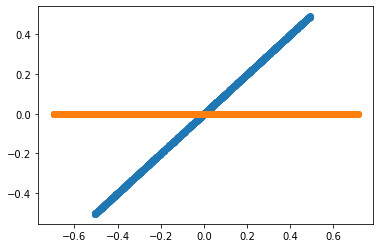

In [3]:
n = 1

x = np.random.uniform(1,2,1000)
y = x.copy() * n

x = x - np.mean(x) 
y = y - np.mean(y) 

data = pd.DataFrame({'x': x, 'y': y}) 
plt.scatter(data.x, data.y)
pca = PCA(n_components=2) 

pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data) 

dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [4]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]'
)
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues or explained variance
[1.72022721e-01 8.11802571e-33]


angle: 45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


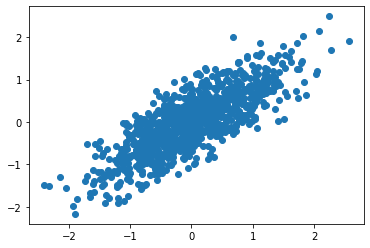

In [5]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
random.seed(100)
std1 = 1 
std2=0.333
x=np.random.normal(0,std1,1000)
y=np.random.normal(0,std2,1000)
x=x-np.mean(x)
y=y-np.mean(y)
n=1
angle=np.arctan(1/n)
print('angle:',angle*180/math.pi)
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])
print('rotationMatrix')
print(rotationMatrix)
xy=np.concatenate(([x],[y]),axis=0).T
data=np.dot(xy,rotationMatrix)
plt.scatter(data[:,0],data[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.72482109  0.68893714]
 [ 0.68893714 -0.72482109]]

Eigenvalues or explained variance
[0.97151697 0.10764567]


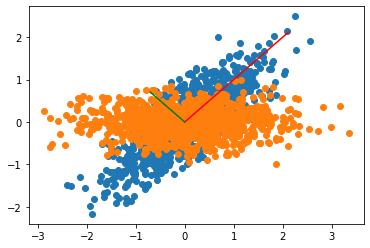

In [6]:
plt.scatter(data[:,0], data[:,1])
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
dataPCA = pcaTr.transform(data)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)
plt.scatter(dataPCA[:,0], dataPCA[:,1])
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

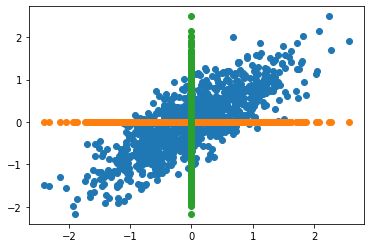

In [7]:
nPoints = len(data)
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], np.zeros(nPoints))
plt.scatter(np.zeros(nPoints), data[:,1])
plt.show()

**Task 2**

In [9]:
%matplotlib inline
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)


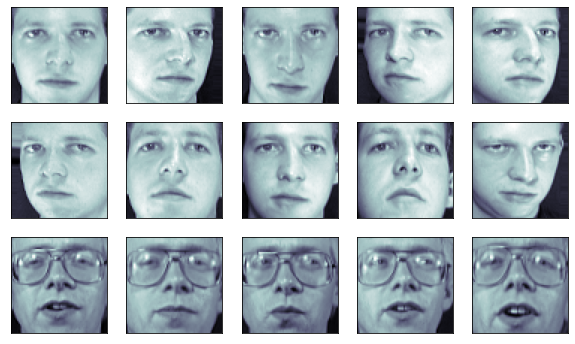

In [10]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


PCA(n_components=175, whiten=True)


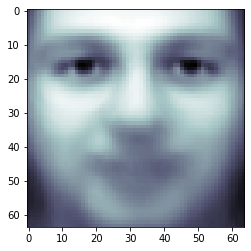

In [12]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=175, whiten=True)
print(pca.fit(X_train))
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
cmap=plt.cm.bone)

(175, 4096)


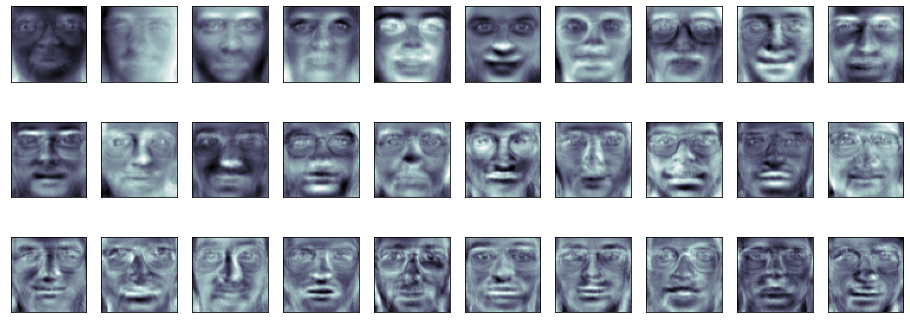

In [13]:
print(pca.components_.shape)
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 175)
(100, 175)


In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

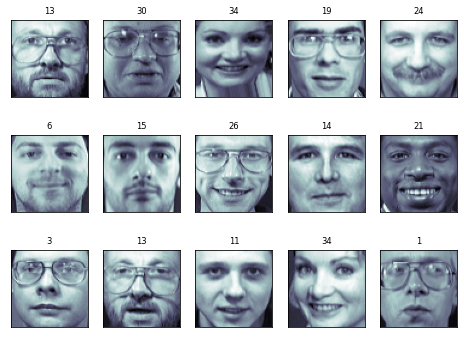

In [16]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [17]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.12      1.00      0.22         1
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.17      1.00      0.29         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.8
precision: [1.         1.         0.5        0.125      1.         1.
 1.         1.         0.16666667 1.         0.5        0.5
 1.         1.         0.75       0.         0.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.75       0.5        1.         1.
 1.         1.        ]
recall: [0.16666667 0.75       0.5        1.         1.         0.8
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         0.         0.         1.
 1.         1.         1.         1.         1.         0.5
 0.5        1.         1.         1.         1.         1.
 0.66666667 1.         1.         1.         1.         1.
 1.         0.66666667]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [21]:
#apply naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

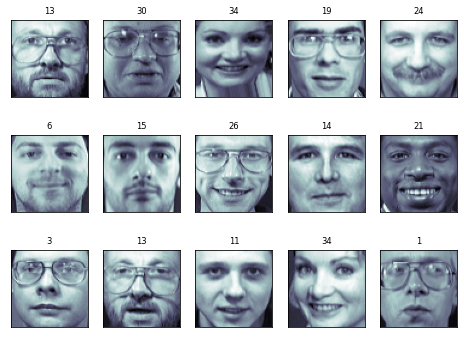

In [22]:
import numpy as np

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [23]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       0.17      1.00      0.29         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.14      1.00      0.25         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [24]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.78
precision: [1.         1.         0.5        0.16666667 0.5        1.
 1.         1.         0.14285714 1.         1.         0.66666667
 1.         1.         0.75       0.         0.         1.
 0.25       1.         1.         1.         1.         1.
 1.         1.         1.         0.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.4       ]
recall: [0.5        0.5        0.5        1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         0.         0.         1.
 1.         1.         1.         1.         0.5        0.5
 0.5        1.         1.         0.         1.         1.
 1.         1.         0.66666667 1.         1.         1.
 1.         0.66666667]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Exercise 1:**

Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

In [26]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [27]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x.shape)
print("number of component  : ",iris.data.T.shape[0])

(150, 4)
number of component  :  4


In [28]:
#without pca
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 61)
gnb = GaussianNB()

gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

print("Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("\n\nReport : \n",metrics.classification_report(y_test,y_pred))

Accuracy : 0.9777777777777777


Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [29]:
#with pca
pca= PCA(n_components = x.T.shape[0])
pca_x= pca.fit_transform(x)

pca_x_train,pca_x_test,pca_y_train,pca_y_test = train_test_split(pca_x,y,test_size=0.30,random_state=61)
gnb = GaussianNB()

gnb.fit(pca_x_train, pca_y_train)
pca_y_pred = gnb.predict(pca_x_test)

print("Accuracy :", metrics.accuracy_score(pca_y_test, pca_y_pred))
print("\n\nReport : \n",metrics.classification_report(pca_y_test,pca_y_pred))

Accuracy : 0.9555555555555556


Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



with out pca accuracy score is better than with pca

**Exercise 2:**

Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations.

Eigenvector : 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]

Eigenvalues : [4.22824171 0.24267075 0.0782095  0.02383509]


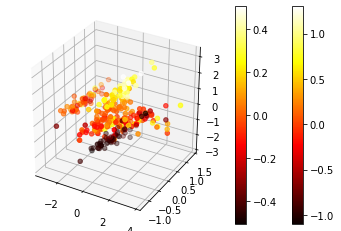

In [30]:
from sklearn import datasets
from sklearn import decomposition

iris=datasets.load_iris()

x=iris.data

x1=x[:,0]
x2=x[:,1]
x3=x[:,2]
x4=x[:,3]

x1=x1-np.mean(x1)
x2=x2-np.mean(x2)
x3=x3-np.mean(x3)
x4=x4-np.mean(x4)




data = pd.DataFrame({'x1': x1, 'x2': x2,'x3' : x3,'x4' : x4}) 
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
img=ax.scatter(data.x1, data.x2,data.x3,c=data.x4,cmap=plt.hot())
fig.colorbar(img)

pcaTr = PCA().fit(data)

print('Eigenvector : \n',pcaTr.components_)
print('\nEigenvalues :',pcaTr.explained_variance_)

rotatedData = pcaTr.transform(data) 

dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2','PC3','PC4'])
img2=ax.scatter(dataPCA.PC1, dataPCA.PC2,dataPCA.PC3,c=dataPCA.PC4,)
fig.colorbar(img2)
plt.show()


print('\n\n')

**Exercise 3:**

Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system.

In [31]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [32]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

scaler = StandardScaler()
x = scaler.fit_transform(x)

print("number of component  : ",iris.data.T.shape[0])

pca= PCA(n_components = x.T.shape[0])
pca_x= pca.fit_transform(x)

pca_x_train,pca_x_test,pca_y_train,pca_y_test = train_test_split(pca_x,y,test_size=0.61,random_state=61)
gnb = GaussianNB()

gnb.fit(pca_x_train, pca_y_train)
pca_y_pred = gnb.predict(pca_x_test)

print("Accuracy :", metrics.accuracy_score(pca_y_test, pca_y_pred))
print("\n\nReport : \n",metrics.classification_report(pca_y_test,pca_y_pred))

number of component  :  4
Accuracy : 0.9239130434782609


Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      0.81      0.88        32
           2       0.82      0.96      0.89        28

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.92        92
weighted avg       0.93      0.92      0.92        92

